In [1]:
!ls './Reports/'

gender	it


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


In [3]:

def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


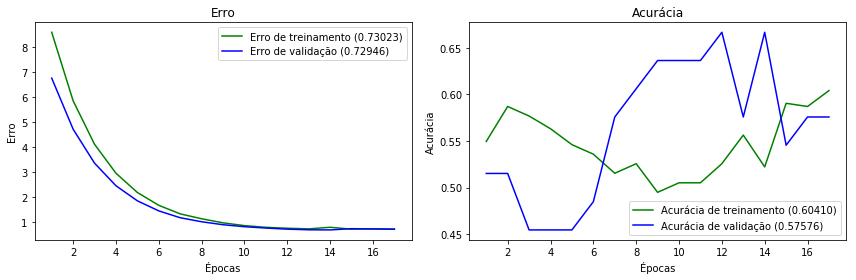

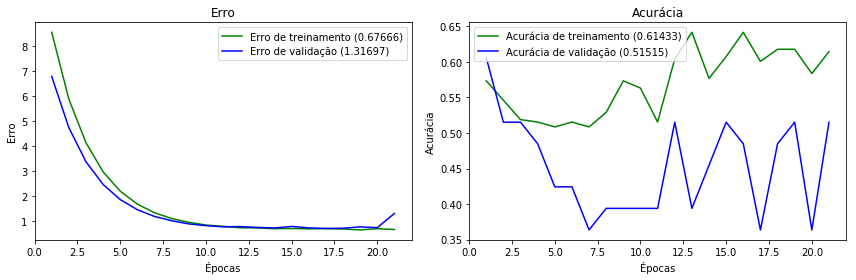

In [5]:
with open('./Reports/it/b5post/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])